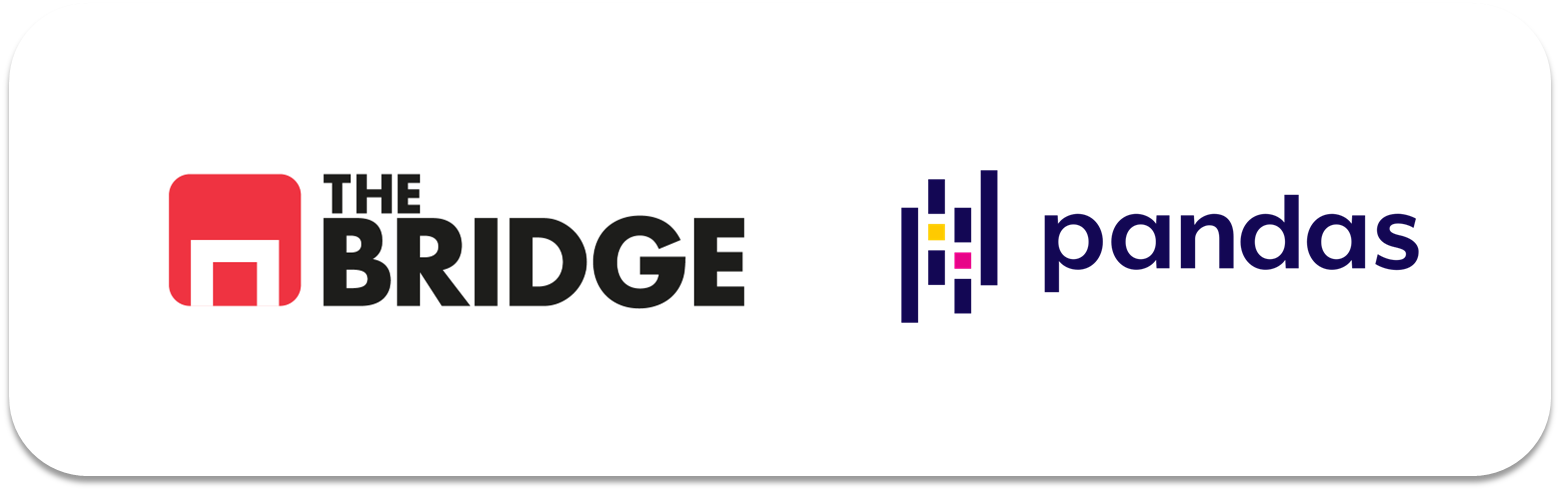

##  Groupby

Como introducción al groupby (sí, eso "agrupar por") vamos a plantear unas cuestiones a nuestros datos de viajes aéreos que ya planteamos en sesiones anteriores. Recordaremos como las resolvimos y eso nos dará pie a ver una forma más eficiente de hacerlo a través de las agrupaciones con groupby y de ahí completaremos con más detalles y posibilidades adicionales.


Por tanto, como en otras sesiones, comencemos creando nuestro `DataFrame` a partir de los datos de vuelos:

In [1]:
import numpy as  np
import pandas as pd

df_aviones = pd.read_csv("./data/dataset_inicial_aviones.csv", index_col = "Id_vuelo")


### ¿Para qué groupby?

En sesiones anteriores le "preguntamos" a nuestro `DataFrame`, `df_aviones`, por la media de consumo de los aviones por compañía, o algo parecido... y lo hacíamo de esta forma, válida, pero farragosa:

In [4]:
for compania in df_aviones["Aircompany"].unique():
    es_compania = df_aviones["Aircompany"] == compania
    print(f"Para la compañía {compania}:")
    for avion in df_aviones["avion"].unique():
        es_avion = df_aviones["avion"] == avion
        consumo = df_aviones.loc[es_compania & es_avion,"consumo_kg"].mean()
        print(f"Tipo <{avion}> consumo medio por vuelo <{consumo:.2f}>")

Para la compañía Airnar:
Tipo <Boeing 737> consumo medio por vuelo <25213.52>
Tipo <Airbus A380> consumo medio por vuelo <101402.62>
Tipo <Boeing 747> consumo medio por vuelo <87208.77>
Tipo <Airbus A320> consumo medio por vuelo <15233.35>
Para la compañía FlyQ:
Tipo <Boeing 737> consumo medio por vuelo <20474.09>
Tipo <Airbus A380> consumo medio por vuelo <116860.27>
Tipo <Boeing 747> consumo medio por vuelo <86157.20>
Tipo <Airbus A320> consumo medio por vuelo <12255.75>
Para la compañía TabarAir:
Tipo <Boeing 737> consumo medio por vuelo <12305.06>
Tipo <Airbus A380> consumo medio por vuelo <62575.39>
Tipo <Boeing 747> consumo medio por vuelo <58840.01>
Tipo <Airbus A320> consumo medio por vuelo <15545.64>
Para la compañía MoldaviAir:
Tipo <Boeing 737> consumo medio por vuelo <30233.62>
Tipo <Airbus A380> consumo medio por vuelo <149316.55>
Tipo <Boeing 747> consumo medio por vuelo <133625.46>
Tipo <Airbus A320> consumo medio por vuelo <8422.85>
Para la compañía PamPangea:
Tipo <Boe

Esta forma aunque eficaz en términos humanos, es decir una persona tiene la info que quería, no es muy buena en términos de programacion por dos motivos:
1. El código es farragoso y aún haciéndolo una función que tuviera las columnas como parámetro sería complejo mantenerlo.
2. La salida no es muy manejable posteriormente, aunque es verdad que podríamos crearnos una estructura de salida, complicando aún más el código.

Es para este tipo de situaciones para lo que aparece el método groupby, pero ojo no solo para estas como iremos viendo en esta y las siguientes sesiones.

In [5]:
df_aviones.groupby(["Aircompany","avion"])["consumo_kg"].mean()

Aircompany  avion      
Airnar      Airbus A320     15233.354249
            Airbus A380    101402.622197
            Boeing 737      25213.516883
            Boeing 747      87208.773559
FlyQ        Airbus A320     12255.748389
            Airbus A380    116860.268168
            Boeing 737      20474.087328
            Boeing 747      86157.201917
MoldaviAir  Airbus A320      8422.846644
            Airbus A380    149316.553108
            Boeing 737      30233.624810
            Boeing 747     133625.459193
PamPangea   Airbus A320      7689.835407
            Airbus A380    135216.291382
            Boeing 737      28712.313147
            Boeing 747     127566.722008
TabarAir    Airbus A320     15545.639162
            Airbus A380     62575.392039
            Boeing 737      12305.056732
            Boeing 747      58840.011691
Name: consumo_kg, dtype: float64

Compara los dos "trozos" de código... Sin duda es mejor el segundo ya sólo en tiempo de escritura... Pero además la salida del groupby la podemos almacenar directamente en una variable

In [7]:
agrupacion=df_aviones.groupby(["Aircompany","avion"])["consumo_kg"].mean()
print(type(agrupacion))

<class 'pandas.core.series.Series'>


Nos ha devuelto un objeto `Series` de  Pandas que podemos manipular como cualquier otro `Series`:

In [8]:
agrupacion.value_counts()

consumo_kg
15233.354249     1
101402.622197    1
12305.056732     1
62575.392039     1
15545.639162     1
127566.722008    1
28712.313147     1
135216.291382    1
7689.835407      1
133625.459193    1
30233.624810     1
149316.553108    1
8422.846644      1
86157.201917     1
20474.087328     1
116860.268168    1
12255.748389     1
87208.773559     1
25213.516883     1
58840.011691     1
Name: count, dtype: int64

In [9]:
agrupacion.index

MultiIndex([(    'Airnar', 'Airbus A320'),
            (    'Airnar', 'Airbus A380'),
            (    'Airnar',  'Boeing 737'),
            (    'Airnar',  'Boeing 747'),
            (      'FlyQ', 'Airbus A320'),
            (      'FlyQ', 'Airbus A380'),
            (      'FlyQ',  'Boeing 737'),
            (      'FlyQ',  'Boeing 747'),
            ('MoldaviAir', 'Airbus A320'),
            ('MoldaviAir', 'Airbus A380'),
            ('MoldaviAir',  'Boeing 737'),
            ('MoldaviAir',  'Boeing 747'),
            ( 'PamPangea', 'Airbus A320'),
            ( 'PamPangea', 'Airbus A380'),
            ( 'PamPangea',  'Boeing 737'),
            ( 'PamPangea',  'Boeing 747'),
            (  'TabarAir', 'Airbus A320'),
            (  'TabarAir', 'Airbus A380'),
            (  'TabarAir',  'Boeing 737'),
            (  'TabarAir',  'Boeing 747')],
           names=['Aircompany', 'avion'])

El índice es un indice multidimensional (cada valor es una tupla) en los que no vamos a profundizar, pero que se puede operar como cualquier otro indice de una serie:


In [11]:
agrupacion[("Airnar","Airbus A320")]

15233.354248972972

### Groupby con cierto detalle

El método groupby de un `DataFrame` (también lo hay para `Series` pero eso puedes consultarlo [aquí](https://pandas.pydata.org/docs/reference/api/pandas.Series.groupby.html)) tiene varios argumentos interesantes, el primero ya lo hemos visto la lista de columnas por las que queremos agrupar (puede ser sólo una) y otro es el argumento `as_index` que veremos luego. Antes es interesante destacar que groupby es un método "vago" [si como Jose Mota, si hay que ir se va pero ir pa ná]. Veámoslo, ejecutando solo el groupby:

In [12]:
df_aviones.groupby(["Aircompany","avion"])

Nos ha devuelto un objeto groupby, eso y nada de primeras es lo mismo. Para obtener algo hay que decir qué tiene que hacer con las columnas restantes:

In [13]:
df_aviones.groupby(["Aircompany","avion"]).count()

Origen  Destino  Distancia  consumo_kg  duracion
Aircompany avion                                                        
Airnar     Airbus A320      37       37         37          37        37
           Airbus A380      64       64         64          64        64
           Boeing 737       49       49         49          49        49
           Boeing 747       68       68         68          68        68
FlyQ       Airbus A320      34       34         34          34        34
           Airbus A380      61       61         61          61        61
           Boeing 737       54       54         54          54        54
           Boeing 747       67       67         67          67        67
MoldaviAir Airbus A320      35       35         35          35        35
           Airbus A380      74       74         74          74        74
           Boeing 737       84       84         84          84        84
           Boeing 747       71       71         71          71        71
PamPangea  Airbus A320      31       31         31          31        31
           Airbus A380      73       73         73          73        73
           Boeing 737       66       66         66          66        66
           Boeing 747       61       61         61          61        61
TabarAir   Airbus A320      61       61         61          61        61
           Airbus A380      71       71         71          71        71
           Boeing 737       62       62         62          62        62
           Boeing 747       77       77         77          77        77

In [14]:
df_aviones.groupby(["avion","Aircompany"]).count()

Origen  Destino  Distancia  consumo_kg  duracion
avion       Aircompany                                                  
Airbus A320 Airnar          37       37         37          37        37
            FlyQ            34       34         34          34        34
            MoldaviAir      35       35         35          35        35
            PamPangea       31       31         31          31        31
            TabarAir        61       61         61          61        61
Airbus A380 Airnar          64       64         64          64        64
            FlyQ            61       61         61          61        61
            MoldaviAir      74       74         74          74        74
            PamPangea       73       73         73          73        73
            TabarAir        71       71         71          71        71
Boeing 737  Airnar          49       49         49          49        49
            FlyQ            54       54         54          54        54
            MoldaviAir      84       84         84          84        84
            PamPangea       66       66         66          66        66
            TabarAir        62       62         62          62        62
Boeing 747  Airnar          68       68         68          68        68
            FlyQ            67       67         67          67        67
            MoldaviAir      71       71         71          71        71
            PamPangea       61       61         61          61        61
            TabarAir        77       77         77          77        77

En este caso, no como en el primer que previamente a la función de "agregacion" (mean en ese caso) dijimos que sólo queríamos operar sobre la columna "consumo_kg", nos devuelve un `DataFrame`. Comprobémoslo: 

In [15]:
type(df_aviones.groupby(["avion","Aircompany"]).count())

pandas.core.frame.DataFrame

Como ya has visto podemos hacer el agrupado y luego sólo coger varias columnas y actuar sobre ellas, con diferentes funciones... Calcula ahora por Compañía y Destino el número de vuelos, venga...:

In [16]:
df_aviones.groupby(["Aircompany","Destino"]).count()

Origen  Distancia  avion  consumo_kg  duracion
Aircompany Destino                                                    
Airnar     Bali             37         37     37          37        37
           Cincinnati       40         40     40          40        40
           Cádiz            36         36     36          36        36
           Ginebra          35         35     35          35        35
           Los Angeles      31         31     31          31        31
           París            39         39     39          39        39
FlyQ       Bali             36         36     36          36        36
           Barcelona        33         33     33          33        33
           Cincinnati       21         21     21          21        21
           Ginebra          33         33     33          33        33
           Nueva York       40         40     40          40        40
           Roma             53         53     53          53        53
MoldaviAir Bali             45         45     45          45        45
           Cincinnati       48         48     48          48        48
           Cádiz            38         38     38          38        38
           Londres          53         53     53          53        53
           Melbourne        43         43     43          43        43
           París            37         37     37          37        37
PamPangea  Bali             34         34     34          34        34
           Ginebra          49         49     49          49        49
           Londres          29         29     29          29        29
           Melbourne        40         40     40          40        40
           Nueva York       31         31     31          31        31
           París            48         48     48          48        48
TabarAir   Cincinnati       35         35     35          35        35
           Ginebra          46         46     46          46        46
           Londres          50         50     50          50        50
           Los Angeles      39         39     39          39        39
           Nueva York       50         50     50          50        50
           Roma             51         51     51          51        51

Pero puede que queramos ver por ejemplo la duración media del vuelo y el consumo medio realizado por Compañía, Origen, Destino:

In [18]:
df_aviones.groupby(["Aircompany","Origen","Destino"]).mean()

TypeError: agg function failed [how->mean,dtype->object]

Nos da error, porque si la función de agregación no se puede aplicar a alguna de las columnas que no hacen agrupación y no se han filtrado, en este caso "avion" que es un str no admite media, da un error (contar filas no da error :-)

Tendríamos que filtar previamente como hemos hecho con "consumo_kg", y quedarnos con las columnas que queremos o por lo menos con aquellas para las que la función final que aplicamos (mean, en este caso) sea válida

In [22]:
df_medias=df_aviones.groupby(["Aircompany","Origen","Destino"])[["consumo_kg","duracion"]].mean()

In [23]:
df_medias

consumo_kg     duracion
Aircompany Origen Destino                                
Airnar     Bali   Cincinnati   112339.922240  1270.000000
                  Cádiz        106410.468366  1074.750000
                  Ginebra      111117.939111   933.500000
                  Los Angeles  153932.767333   876.000000
                  París        118795.798064   860.200000
...                                      ...          ...
TabarAir   Roma   Cincinnati    50946.369760   565.111111
                  Ginebra        4974.192300    68.750000
                  Londres       10142.387090   120.500000
                  Los Angeles   51744.312442   776.714286
                  Nueva York    64655.752226   503.500000

[150 rows x 2 columns]

Pero son muchos resultados, ¿como filtro? Pues aunque no hablermos mucho más de multindice, miremos varios ejemplos:

In [26]:
# Resultados para la compañía Airnar
df_medias.loc["Airnar"]

# Resultados para todos los vuelos París-Cádiz
df_medias.loc[:,"París","Cádiz"]

# Resultados para los vuelos a Ginebra y Nueva York de FlyQ
df_medias.loc["FlyQ",:,["Ginebra","Nueva York"]]



consumo_kg     duracion
Aircompany Origen     Destino                               
FlyQ       Bali       Ginebra      86324.406749   992.500000
                      Nueva York  205535.498133  1305.000000
           Barcelona  Ginebra       3137.607000    67.000000
                      Nueva York   50478.315865   466.090909
           Cincinnati Ginebra      26536.620921   569.000000
                      Nueva York    7525.078640    83.300000
           Ginebra    Nueva York   52479.317869   478.333333
           Nueva York Ginebra      65028.950400   442.666667
           Roma       Ginebra       3781.019467    68.666667
                      Nueva York   45099.228460   547.142857

Nosotros, en general, si queremos conservar la salida de un groupby para seguir procesándola, emplearemos el argumento `as_index` con valor "False"

In [27]:
resultado_no_index = df_aviones.groupby(["Aircompany","Origen","Destino"], as_index = False)[["consumo_kg","duracion"]].mean()

In [28]:
resultado_no_index

Aircompany Origen      Destino     consumo_kg     duracion
0       Airnar   Bali   Cincinnati  112339.922240  1270.000000
1       Airnar   Bali        Cádiz  106410.468366  1074.750000
2       Airnar   Bali      Ginebra  111117.939111   933.500000
3       Airnar   Bali  Los Angeles  153932.767333   876.000000
4       Airnar   Bali        París  118795.798064   860.200000
..         ...    ...          ...            ...          ...
145   TabarAir   Roma   Cincinnati   50946.369760   565.111111
146   TabarAir   Roma      Ginebra    4974.192300    68.750000
147   TabarAir   Roma      Londres   10142.387090   120.500000
148   TabarAir   Roma  Los Angeles   51744.312442   776.714286
149   TabarAir   Roma   Nueva York   64655.752226   503.500000

[150 rows x 5 columns]

Porque de esta forma seguiremos teniendo toda la información en columnas, eso sí como se han agrupado observa que los índices originales (los identificadores del vuelo) pierden sentido y se pierden...